# Project: Investigate a Dataset (Gapminder: Exploring Demographies!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [876]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns




<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

## General Properties

### Loading the excel files

All excel files are loaded using pandas 'read_excel' version. Short notes are provided at end of each line providing context of data.

In [877]:
# Load the data
oil_prod = pd.read_excel('Oil Production.xlsx', sheet_name = 'Data') #total production of oil
oil_proven = pd.read_excel('Oil Proved reserves.xlsx',sheet_name = 'Data') # total proven reserves of oil
oil_consume = pd.read_excel('Oil Consumption.xlsx',sheet_name = 'Data') #consumtion of oil
gni = pd.read_excel('indicatorGNItotalPPP.xlsx',sheet_name = 'Data') # Total gross net income converted to international dollars using purchasing power parity rates.
lit_rate = pd.read_excel('indicator_literacy_rate.xlsx',sheet_name = 'Data') #literacy rate in %
emp_rate = pd.read_excel('indicator_t above 15_employment_population_ratio.xlsx',sheet_name = 'Data') #Employment rate for 15+ years adults
life_exp = pd.read_excel('indicator life_expectancy_at_birth.xlsx',sheet_name = 'Data') # Life expectancy in years
smk_female = pd.read_excel ('indicator_prevalence of current tobacco use among adults (%) female.xlsx',sheet_name = 'Data') #female smokers in %
smk_male = pd.read_excel ('indicator_prevalence of current tobacco use among adults (%) male.xlsx',sheet_name = 'Data') #male smokers in %               


### Exploring the data and its properties prior to cleaning

#### Utilizing the head, info, dtypes and histograms to get a good idea of dataset and plan accordingly for cleaning the data.

In [878]:
# Checking the first 5 rows for each dataset
oil_prod.head()
# Expected to see a lot of null values, as many countries are not oil producers

,"Crude oil production, total (toe)",1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,26481000.0,33872000.0,39076000.0,42904000.0,44784000.0,48208000.0,37099000.0,50098000.0,50888000.0,...,70894000.0,79005000.0,83551000.0,86437670.0,86202000.0,86482000.0,8.562018e+07,7.784691e+07,7.550114e+07,7.431146e+07


#### Replacing the column 1 name with country name

In [879]:
#Replacing the column 1 name with country name
oil_prod = oil_prod.rename(columns={oil_prod.columns[0]: 'Country'}) 
oil_proven = oil_proven.rename(columns={oil_proven.columns[0]: 'Country'}) 
oil_consume = oil_consume.rename(columns={oil_consume.columns[0]: 'Country'}) 
gni = gni.rename(columns={gni.columns[0]: 'Country'}) 

In [880]:
oil_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 48 columns):
Country    275 non-null object
1965       36 non-null float64
1966       37 non-null float64
1967       37 non-null float64
1968       39 non-null float64
1969       39 non-null float64
1970       39 non-null float64
1971       40 non-null float64
1972       42 non-null float64
1973       42 non-null float64
1974       42 non-null float64
1975       42 non-null float64
1976       42 non-null float64
1977       42 non-null float64
1978       42 non-null float64
1979       42 non-null float64
1980       42 non-null float64
1981       43 non-null float64
1982       43 non-null float64
1983       43 non-null float64
1984       43 non-null float64
1985       43 non-null float64
1986       44 non-null float64
1987       45 non-null float64
1988       45 non-null float64
1989       45 non-null float64
1990       45 non-null float64
1991       45 non-null float64
1992       46 non-null floa

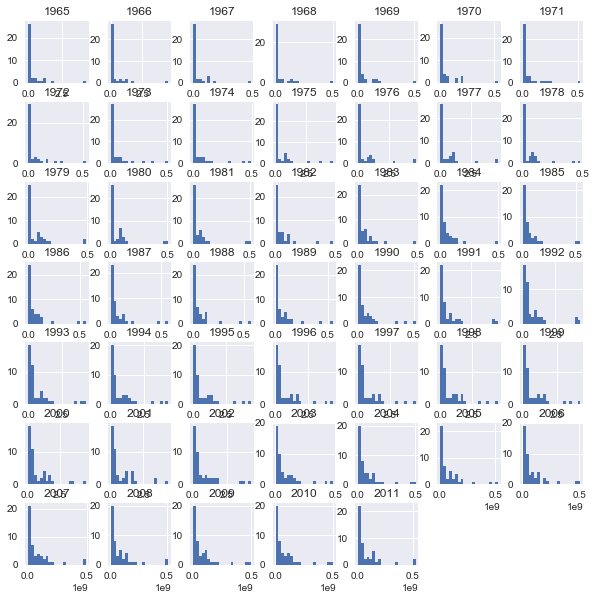

In [881]:
#Exploring data with histogram.
oil_prod.hist(bins= 20, figsize= (10,10));
#production data is right skewed, most nations are non-oil producing.

In [882]:
oil_prod.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,3.600000e+01,3.700000e+01,3.700000e+01,3.900000e+01,3.900000e+01,3.900000e+01,4.000000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.700000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01,4.800000e+01
mean,3.594683e+07,3.797267e+07,4.064622e+07,4.224891e+07,4.560825e+07,5.049943e+07,5.210008e+07,5.250194e+07,5.731077e+07,5.679905e+07,...,7.528571e+07,7.614095e+07,7.974359e+07,8.053478e+07,8.080068e+07,8.075730e+07,8.152256e+07,7.956299e+07,8.118988e+07,8.215746e+07
std,7.897325e+07,8.259329e+07,8.808066e+07,9.054929e+07,9.323808e+07,9.857191e+07,9.959081e+07,1.018014e+08,1.079713e+08,1.084993e+08,...,9.652898e+07,1.040518e+08,1.084341e+08,1.102814e+08,1.100228e+08,1.089150e+08,1.102022e+08,1.069100e+08,1.091443e+08,1.160546e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.518000e+06,1.237410e+06,3.376000e+06,3.439000e+06,3.306000e+06,4.608000e+06,4.209776e+06,3.950356e+06,3.649308e+06,3.585000e+06
25%,5.984453e+05,6.310000e+05,1.723000e+06,1.337784e+06,2.341805e+06,4.007561e+06,3.303202e+06,3.597939e+06,3.801054e+06,3.924501e+06,...,1.350870e+07,1.278998e+07,1.408790e+07,1.442622e+07,1.581097e+07,1.450851e+07,1.383972e+07,1.409762e+07,1.375662e+07,1.241370e+07
50%,8.663003e+06,7.562912e+06,8.850564e+06,8.577000e+06,1.123391e+07,1.175993e+07,1.288440e+07,9.819683e+06,1.057493e+07,9.630694e+06,...,3.524200e+07,3.607350e+07,3.592160e+07,3.425400e+07,3.469700e+07,3.472435e+07,3.529371e+07,3.563111e+07,3.992964e+07,3.778876e+07
75%,2.502170e+07,2.392946e+07,2.574689e+07,2.725296e+07,3.070951e+07,4.566071e+07,4.716413e+07,5.356662e+07,6.406329e+07,6.827422e+07,...,1.031290e+08,1.071330e+08,1.052034e+08,9.858091e+07,1.035435e+08,1.074447e+08,1.075253e+08,1.067294e+08,1.130897e+08,1.152757e+08
max,4.276871e+08,4.545269e+08,4.842091e+08,5.028932e+08,5.113680e+08,5.334974e+08,5.258989e+08,5.278931e+08,5.146546e+08,4.913961e+08,...,4.241200e+08,4.838018e+08,5.043054e+08,5.248709e+08,5.124392e+08,4.923720e+08,5.134809e+08,4.942470e+08,5.051300e+08,5.258003e+08


In [883]:
oil_proven.head()
# Dashed out null values instead of NAN, need to clean this up.
# These are proven resources, contrary to production values resources might
# be available, but not viable to produce.

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Algeria,1118480000,1102112000,1287616000,1257608000,1227600000,1203048000,1200320000,1168129600,1254880000,...,1543229600,1543229600,1543229600,1543229600,1609520000,1609520000,1673628000,1673628000,1664080000,1664080000
1,Angola,187550000,151131200,198734800,233926000,292850800,275255200,190960000,272800000,272800000,...,688820000,814580800,886600000,1213960000,1200456400,1232374000,1232374000,1232374000,1841400000,1841400000
2,Argentina,335134800,296213333,265925440,334148492,320403600,305536000,304581200,306354400,310978360,...,418910151,405613091,392652340,384717343,364803068,338000471,297387858,352834084,356825175,356825175
3,Australia,289551438,357156336,330131535,338281872,393275197,396192160,430337781,432654193,466542435,...,647050946,674504712,675620021,623457866,605698711,553364970,567091853,567091853,567091853,567151200
4,Azerbaijan,-,-,-,-,-,-,-,-,-,...,160679200,160679200,160679200,954800000,954800000,954800000,954800000,954800000,954800000,954800000


In [884]:
oil_proven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
Country    48 non-null object
1980       48 non-null object
1981       48 non-null object
1982       48 non-null object
1983       48 non-null object
1984       48 non-null object
1985       48 non-null object
1986       48 non-null object
1987       48 non-null object
1988       48 non-null object
1989       48 non-null object
1990       48 non-null object
1991       48 non-null object
1992       48 non-null object
1993       48 non-null object
1994       48 non-null object
1995       48 non-null object
1996       48 non-null object
1997       48 non-null object
1998       48 non-null object
1999       48 non-null object
2000       48 non-null int64
2001       48 non-null int64
2002       48 non-null int64
2003       48 non-null int64
2004       48 non-null int64
2005       48 non-null int64
2006       48 non-null int64
2007       48 non-null int64
2008       48 non-null int64
dtypes

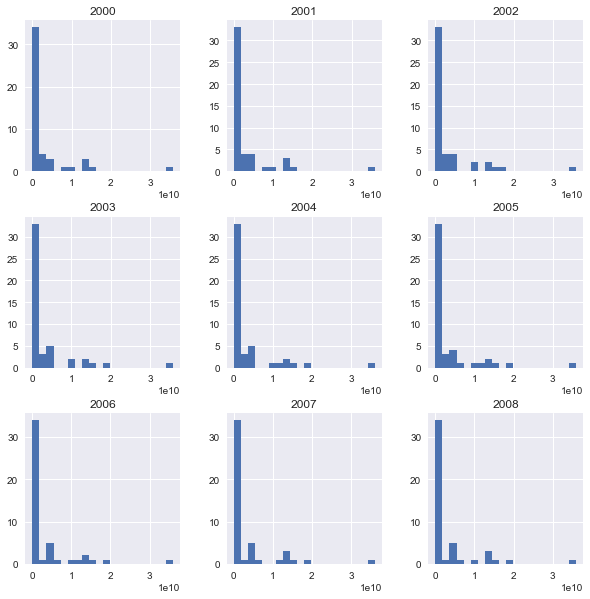

In [885]:
#Exploring data with histogram.
oil_proven.hist(bins= 20, figsize= (10,10));
#right skewed data

In [886]:
oil_consume.head()
#Need to clean up dashed out values

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Algeria,1289000,1693000,1578000,1682000,1775000,2032000,2288000,2514000,2739000,...,9744000,10134000,10598000,11039396,11519500,12904556,14012890,14900000.0,14900000.0,NaN
1,Argentina,21952000,22678000,23224000,23733000,24671000,21942000,23491000,23162000,23189000,...,17107000,17558000,18401000,19676875,20555955,23192795,24219411,23700000.0,25700000.0,NaN
2,Australia,16902000,18120000,19812000,21892000,23425000,24451000,25803000,25784000,28206000,...,37970000,38275000,38791278,39838432,41414188,41732248,42461108,42200000.0,42600000.0,NaN
3,Austria,5534000,6068000,6491000,7513000,8253000,9071000,10127000,10923000,11831000,...,13040000,14136000,13755000,14170000,14195000,13394000,13421000,13000000.0,13000000.0,NaN
4,Azerbaijan,-,-,-,-,-,-,-,-,-,...,3665000,4272000,4579000,5347000,4868500,4496000,3340300,3200000.0,3300000.0,NaN


In [887]:
# Checking data info
oil_consume.info()

# Mixed data type and 2011 column doesn't have any data so cannot use that 
# year for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 48 columns):
Country    64 non-null object
1965       64 non-null object
1966       64 non-null object
1967       64 non-null object
1968       64 non-null object
1969       64 non-null object
1970       64 non-null object
1971       64 non-null object
1972       64 non-null object
1973       64 non-null object
1974       64 non-null object
1975       64 non-null object
1976       64 non-null object
1977       64 non-null object
1978       64 non-null object
1979       64 non-null object
1980       64 non-null object
1981       64 non-null object
1982       64 non-null object
1983       64 non-null object
1984       64 non-null object
1985       64 non-null int64
1986       64 non-null int64
1987       64 non-null int64
1988       64 non-null int64
1989       64 non-null int64
1990       64 non-null int64
1991       64 non-null int64
1992       64 non-null int64
1993       64 non-null int64
1994  

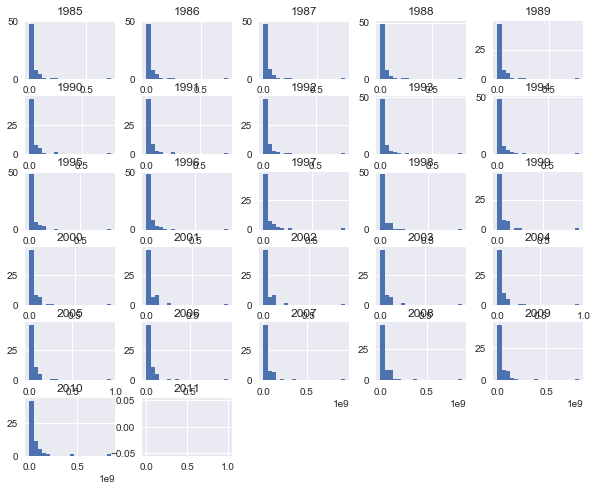

In [888]:
#Exploring data with histogram.
oil_consume.hist(bins = 20, figsize= (10,8));
#right skewed data

In [889]:
gni.head()
#large numeric values, will need to convert it into higher denomination

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.336378e+10,1.678050e+10,1.893645e+10,2.240887e+10,2.729843e+10,3.070364e+10,2.809452e+10,3.341694e+10,3.634080e+10,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.539573e+10,1.663143e+10,1.801537e+10,1.954609e+10,2.208245e+10,2.343622e+10,2.635538e+10,2.732051e+10,2.747576e+10,2.863173e+10
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.767201e+11,1.927724e+11,2.079228e+11,2.240600e+11,2.387023e+11,2.596084e+11,2.732739e+11,2.879803e+11,2.859299e+11,3.010651e+11


In [890]:
# Checking data info
gni.info()

#1961-1979 data is empty
#2004 to 2009 has good data density, to be considered while selecting time range.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 52 columns):
Country    272 non-null object
1961       0 non-null float64
1962       0 non-null float64
1963       0 non-null float64
1964       0 non-null float64
1965       0 non-null float64
1966       0 non-null float64
1967       0 non-null float64
1968       0 non-null float64
1969       0 non-null float64
1970       0 non-null float64
1971       0 non-null float64
1972       0 non-null float64
1973       0 non-null float64
1974       0 non-null float64
1975       0 non-null float64
1976       0 non-null float64
1977       0 non-null float64
1978       0 non-null float64
1979       0 non-null float64
1980       122 non-null float64
1981       126 non-null float64
1982       130 non-null float64
1983       130 non-null float64
1984       133 non-null float64
1985       137 non-null float64
1986       139 non-null float64
1987       141 non-null float64
1988       142 non-null float64
1989  

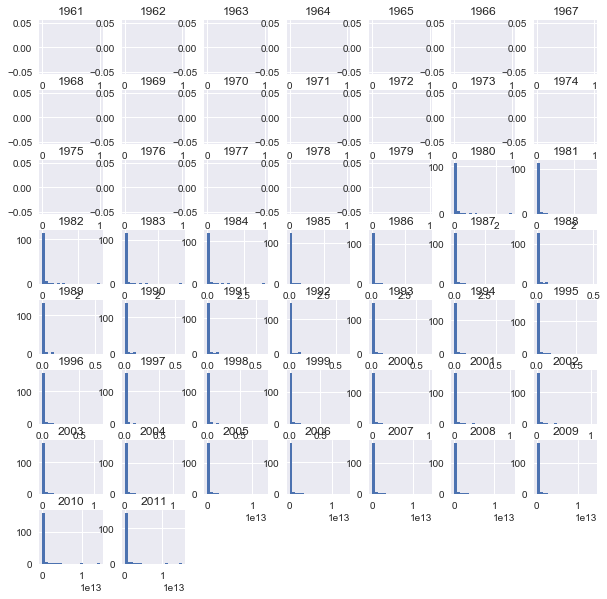

In [891]:
#Exploring data with histogram.
gni.hist(bins= 20, figsize= (10,10));
#right skewed data, nothing a

# Data Cleaning (Selecting Year and removing the null values)

Based on initial analysis of data type and null values in data, in this section we will proceed with further cleaning the data. For each of the sub data set, null values will be removed and time range of analysis will be set (depending on data available).

##  Case-1: Oil Reservoir,Production & Consumption trends. Also how GNI of oil producing nations appears.
Since the latest available data for oil_proven (proven oil resources) is for 2008, let's focus on 2008 data. <br> Data below from 4 df's: <br>
 >i)  oil_prod: Oil Produced <br>
 >ii) oil_proven: Proven oil resources <br>
 >iii)oil_consume: Oil consumed  <br>
 >iv) gni: total gross net income converted to international dollars using PPP rates <br>

### oil_prod : Oil Produced in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [892]:
# Selecting columns
oil_prod = oil_prod[['Country',2008]]

# Dropping null values

oil_prod = oil_prod.dropna()

#Renaming column

oil_prod.rename (columns={2008: 'oil_production'}, inplace = True)
oil_prod.head()

,Country,oil_production
4,Algeria,8.562018e+07
7,Angola,9.347852e+07
10,Argentina,3.412383e+07
13,Australia,2.435672e+07
15,Azerbaijan,4.474850e+07


As the value of oil produced is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [893]:
# Unit coversion
oil_prod['oil_production']= oil_prod['oil_production']*.0000001

### oil_proven : Proven oil resources in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [894]:
# Selecting the country and specifying year
oil_proven = oil_proven[['Country',2008]]

# Dropping null values

oil_proven = oil_proven.dropna()

#renaming to prepare the data for merge later

oil_proven.rename (columns={2008: 'oil_proven'}, inplace = True)

oil_proven.head()

,Country,oil_proven
0,Algeria,1664080000
1,Angola,1841400000
2,Argentina,356825175
3,Australia,567151200
4,Azerbaijan,954800000


As the value of oil reservoir is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [895]:
# Unit conversion
oil_proven['oil_proven'] = oil_proven['oil_proven']*.0000001

### oil_consume : Oil Consumed in TOE

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [896]:
# Selecting the country and specifying year
oil_consume = oil_consume[['Country',2008]]

# Dropping null values

oil_consume = oil_consume.dropna()

#renaming to prepare the data for merge later

oil_consume.rename (columns={2008: 'oil_consume'}, inplace = True)
oil_consume.head()

,Country,oil_consume
0,Algeria,14012890
1,Argentina,24219411
2,Australia,42461108
3,Austria,13421000
4,Azerbaijan,3340300


As the value of oil consumption is in toe, for better visualization converting from toe (tonne of equivalent) to mtoe(million tonne of equivalent)

In [897]:
# Unit conversion
oil_consume['oil_consume'] = oil_consume['oil_consume']*.0000001

### gni_oil : total gross net income ($) converted to international dollars using PPP rates

Columns (Country and 2008(year)) are selected for analysis, null values dropped and renamed the column to prepare the data for merge later.

In [898]:
# Selecting the country and specifying year
gni_oil = gni.iloc[:,[0,48]]

# Dropping null values

gni_oil = gni_oil.dropna()

#renaming to prepare the data for merge later

gni_oil.rename (columns = {'2008' : 'gni_oil'}, inplace = True)
gni_oil.head()

,Country,gni_oil
1,Afghanistan,2.809452e+10
3,Albania,2.635538e+10
4,Algeria,2.732739e+11
7,Angola,8.468289e+10
9,Antigua and Barbuda,1.677932e+09


As the value of gni is in (\$) for better visualization converting from (\$) to million (m\$)

In [899]:
# Unit conversion
gni_oil['gni_oil'] = gni_oil['gni_oil']*.0000001

### Merging the data for charts

Cleaned up data is now merged using inner method. Also a consumption ratio is calculated, which will be used in next section for EDA. <br>
Merged data will be stored under oil_trend_gni.

In [904]:
oil_pro_merge = oil_proven.merge(oil_prod, how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend = oil_consume.merge(oil_pro_merge,how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend_gni = oil_trend.merge(gni_oil, how = 'inner', left_on = 'Country', right_on = 'Country')
oil_trend_gni ['consumption_ratio'] = oil_trend_gni['oil_consume']/oil_trend_gni['oil_production']
oil_trend_gni.head(20)

,Country,oil_consume,oil_proven,oil_production,gni_oil,consumption_ratio
0,Algeria,1.401289,166.408000,8.562018,27327.394520,0.163663
1,Argentina,2.421941,35.682517,3.412383,55984.440152,0.709751
2,Australia,4.246111,56.715120,2.435672,77227.646570,1.743301
3,Azerbaijan,0.334030,95.480000,4.474850,6810.902768,0.074646
4,Brazil,10.534621,172.389413,9.924282,194582.398063,1.061500
5,Canada,10.202961,390.262704,15.590015,128254.438036,0.654455
6,China,37.570980,210.900316,19.043960,824719.141949,1.972855
7,Colombia,1.072379,18.577680,3.199686,38625.815760,0.335151
8,Denmark,0.892800,11.067299,1.403500,22227.020682,0.636124
9,Ecuador,0.928015,52.071614,2.741486,10584.750702,0.338508


Visualizing the data shows us that there are several countries with very small values, those might not be of our interest to compare. <br>
In next step, top 10 countries for different parameters (consumer, production, proven reserves) will be filtered out and plotted.

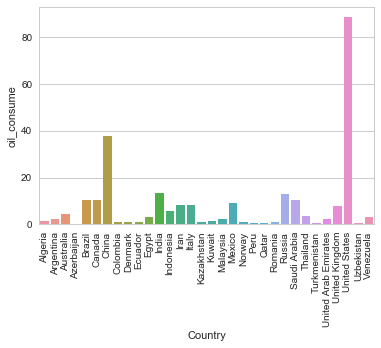

In [901]:
sns.set_style("whitegrid")

ax = sns.barplot(x = "Country", y = 'oil_consume',data = oil_trend_gni );
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
sns.set(rc={'figure.figsize':(11.7,8.27)});


#### Top 15 oil consumer countries (oil_top_consumer)selected using .nlargest function

In [902]:
oil_top_consumer = oil_trend_gni.sort_values('oil_consume').nlargest(15,'oil_consume')

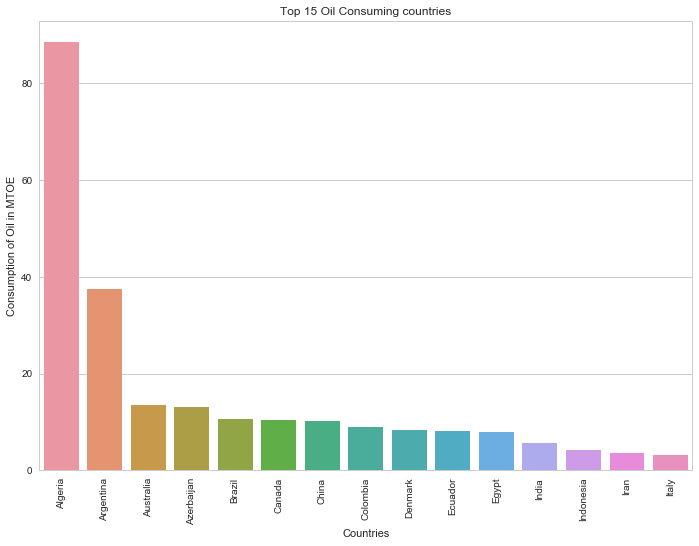

In [903]:
sns.set_style("whitegrid")

ax1 = sns.barplot(x = "Country", y = 'oil_consume',data = oil_top_consumer );
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax1.set_ylabel ('Consumption of Oil in MTOE')
ax1.set_xlabel ('Countries')
ax1.set_title("Top 15 Oil Consuming countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

#### Top 15 oil producer countries (oil_top_producer)selected using .nlargest function

In [874]:
oil_top_producer = oil_trend_gni.sort_values('oil_production').nlargest(15,'oil_production')

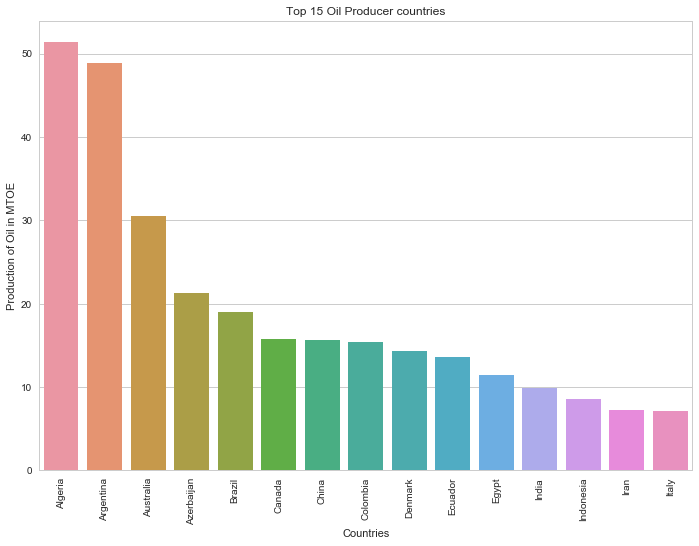

In [875]:
sns.set_style("whitegrid")

ax2 = sns.barplot(x = "Country", y = 'oil_production',data = oil_top_producer);
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax2.set_ylabel ('Production of Oil in MTOE')
ax2.set_xlabel ('Countries')
ax2.set_title("Top 15 Oil Producer countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

#### Top 15 Proven oil reservoir countries (oil_top_proven)selected using .nlargest function

In [804]:
oil_top_proven = oil_trend_gni.sort_values('oil_proven').nlargest(15,'oil_proven')

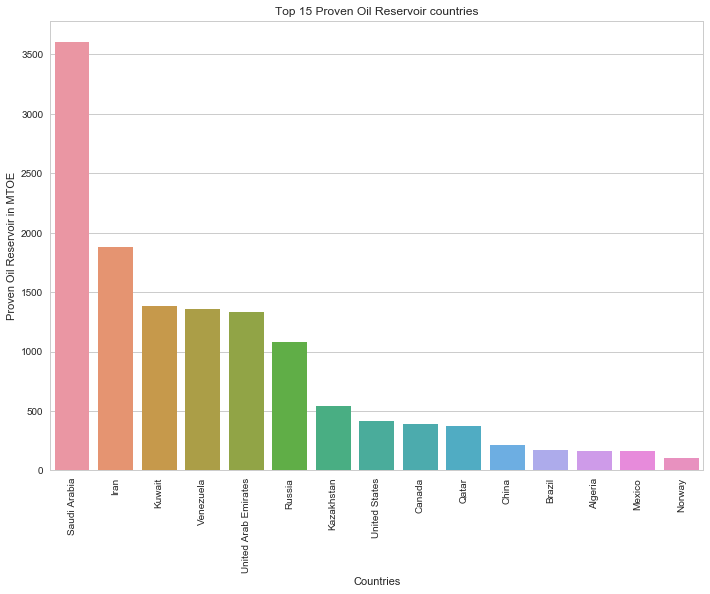

In [847]:
sns.set_style("whitegrid")

ax3 = sns.barplot(x = "Country", y= 'oil_proven',data = oil_top_proven);
ax3.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax3.set_ylabel ('Proven Oil Reservoir in MTOE')
ax3.set_xlabel ('Countries')
ax3.set_title("Top 15 Proven Oil Reservoir countries", size = 12);
sns.set(rc={'figure.figsize':(11.7,8.27)});

Plotting all three on same chart to compare the top 15 countries

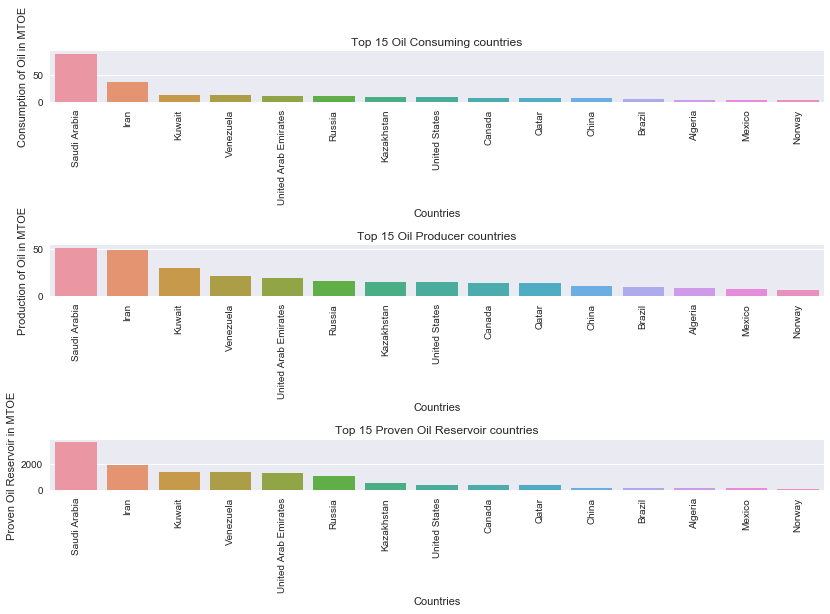

In [849]:
f, (ax1, ax2, ax3) = plt.pyplot.subplots(3);

ax1 = sns.barplot(x = "Country", y = 'oil_consume',data = oil_top_consumer,ax= ax1 );
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax1.set_ylabel ('Consumption of Oil in MTOE')
ax1.set_xlabel ('Countries')
ax1.set_title("Top 15 Oil Consuming countries", size = 12);

ax2 = sns.barplot(x = "Country", y = 'oil_production',data = oil_top_producer, ax= ax2);
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax2.set_ylabel ('Production of Oil in MTOE')
ax2.set_xlabel ('Countries')
ax2.set_title("Top 15 Oil Producer countries", size = 12);


ax3 = sns.barplot(x = "Country", y= 'oil_proven',data = oil_top_proven, ax= ax3);
ax3.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax3.set_ylabel ('Proven Oil Reservoir in MTOE')
ax3.set_xlabel ('Countries')
ax3.set_title("Top 15 Proven Oil Reservoir countries", size = 12);

f.tight_layout()

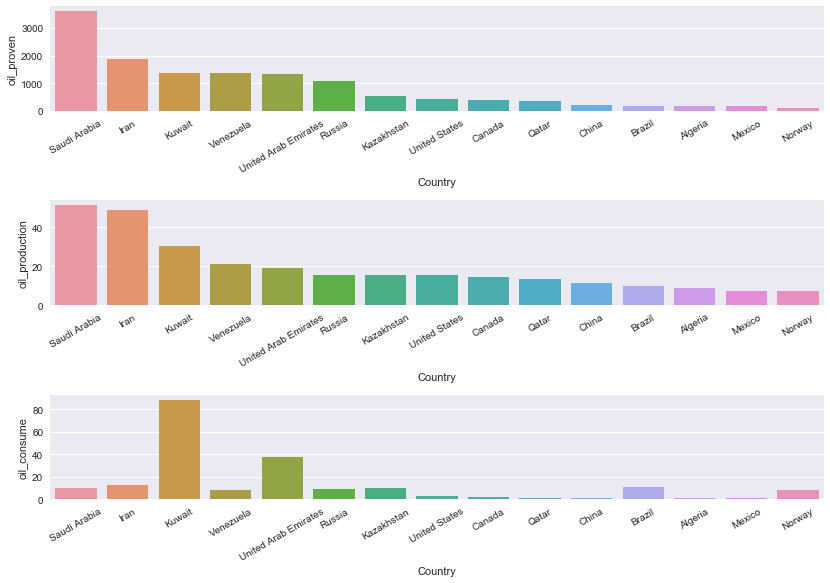

In [828]:
f, (ax1, ax2, ax3) = plt.pyplot.subplots(3);
c1 = sns.barplot(x = "Country", y= 'oil_proven',data = oil_top_proven, ax= ax1);
c2 = sns.barplot(x = "Country", y = 'oil_production',data = oil_top_producer, ax=ax2);
c3 = sns.barplot(x = "Country", y = 'oil_consume',data = oil_top_producer, ax=ax3);
c1.set_xticklabels(ax.get_xticklabels(), rotation=30);
c2.set_xticklabels(ax.get_xticklabels(), rotation=30);
c3.set_xticklabels(ax.get_xticklabels(), rotation=30);
f.tight_layout()

#### Preparing data for scatter plots

Quick view of chart shows that we have outliers on x-axis (Saudi Arabia with a very big proven reservior), and y-axis (Italy, that ha low proven reservoir but high consumption). 

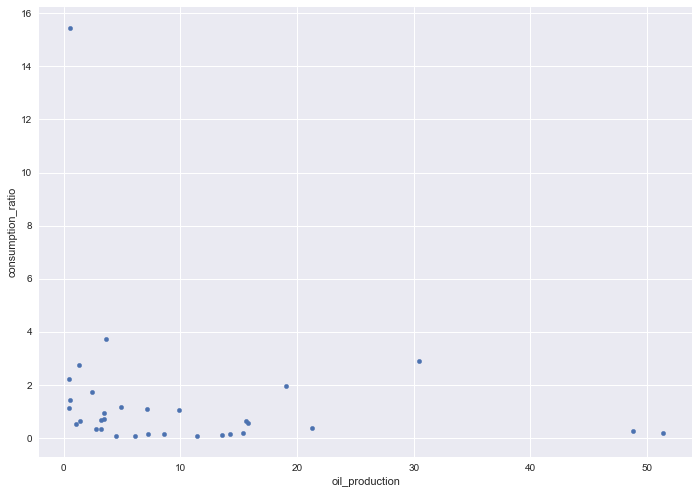

In [815]:
oil_trend_gni.plot(y = 'consumption_ratio', x = 'oil_production', kind= 'scatter');

True


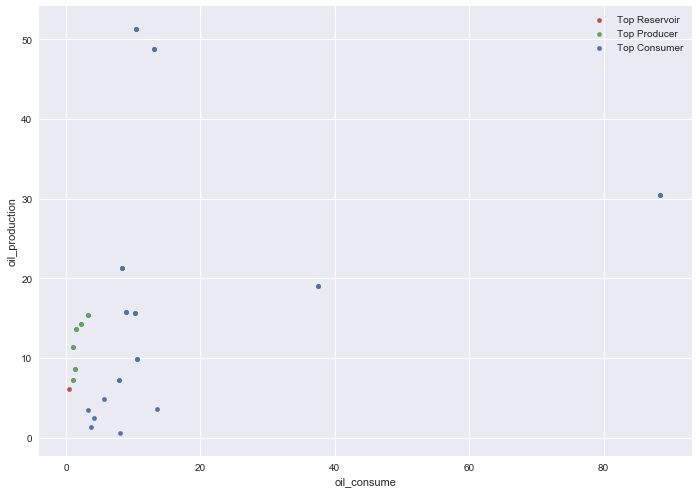

In [813]:
ax1 = oil_top_proven.plot(kind = 'scatter', x='oil_consume', y='oil_production',color = 'r', label = "Top Reservoir")
ax2 = oil_top_producer.plot (kind = 'scatter', x='oil_consume',y='oil_production', color= 'g',ax= ax1, label="Top Producer")
ax3 = oil_top_consumer.plot (kind = 'scatter', x='oil_consume',y='oil_production', color= 'b',ax= ax1, label ="Top Consumer")

print(ax1==ax2==ax3)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!